<a href="https://colab.research.google.com/github/jadiazm2016/linaro-android-gcc/blob/master/data_har_manifold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MotionSense** 
Este conjunto de dados inclui dados de série temporal gerados por sensores de acelerômetro e giroscópio (atitude, gravidade, userAcceleration e rotationRate). Ele é coletado com um iPhone 6s mantido no bolso frontal do participante usando o SensingKit, que coleta informações do framework Core Motion em dispositivos iOS. Todos os dados são coletados na taxa de amostragem de 50Hz. Um total de 24 participantes em uma faixa de gênero, idade, peso e altura realizaram 6 atividades em 15 tentativas no mesmo ambiente e condições: andar de baixo, andar de cima, caminhar, correr, sentar e ficar em pé.

In [ ]:
from urllib.request import urlretrieve
url = "https://github.com/mmalekzadeh/motion-sense/blob/261cb0d60611a049ab38127738e42cc510ed50f4/data/A_DeviceMotion_data.zip"
try:
  !git clone https://github.com/mmalekzadeh/motion-sense.git
  !unzip /content/motion-sense/data/A_DeviceMotion_data.zip
except:
  print("o diretorio já foi criado")

Cloning into 'motion-sense'...
remote: Enumerating objects: 612, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 612 (delta 14), reused 14 (delta 4), pack-reused 578
Receiving objects: 100% (612/612), 201.78 MiB | 38.36 MiB/s, done.
Resolving deltas: 100% (289/289), done.
Checking out files: 100% (74/74), done.
Archive:  /content/motion-sense/data/A_DeviceMotion_data.zip
   creating: A_DeviceMotion_data/
   creating: A_DeviceMotion_data/dws_11/
  inflating: A_DeviceMotion_data/dws_11/sub_12.csv  
  inflating: A_DeviceMotion_data/dws_11/sub_1.csv  
  inflating: A_DeviceMotion_data/dws_11/sub_13.csv  
  inflating: A_DeviceMotion_data/dws_11/sub_11.csv  
  inflating: A_DeviceMotion_data/dws_11/sub_2.csv  
  inflating: A_DeviceMotion_data/dws_11/sub_3.csv  
  inflating: A_DeviceMotion_data/dws_11/sub_10.csv  
  inflating: A_DeviceMotion_data/dws_11/sub_14.csv  
  inflating: A_DeviceMotion_data/dws_11/sub_7.csv  
  inflating

## instalação de bibliotecas

In [ ]:
import numpy as np
import pandas as pd
##_____________________________

def get_ds_infos():
    ## 0:Code, 1:Weight, 2:Height, 3:Age, 4:Gender
    dss = np.genfromtxt("/content/motion-sense/data/data_subjects_info.csv",delimiter=',')
    dss = dss[1:]
    print("----> Data subjects information is imported.")
    return dss
##____________

def creat_time_series(num_features, num_act_labels, num_gen_labels, label_codes, trial_codes):
    dataset_columns = num_features+num_act_labels+num_gen_labels
    ds_list = get_ds_infos()
    train_data = np.zeros((0,dataset_columns))
    test_data = np.zeros((0,dataset_columns))
    for i, sub_id in enumerate(ds_list[:,0]):
        for j, act in enumerate(label_codes):
            for trial in trial_codes[act]:
                #print(act)
                fname = 'A_DeviceMotion_data/'+act+'_'+str(trial)+'/sub_'+str(int(sub_id))+'.csv'
                raw_data = pd.read_csv(fname)
                raw_data = raw_data.drop(['Unnamed: 0'], axis=1)
                unlabel_data = raw_data.values
                label_data = np.zeros((len(unlabel_data), dataset_columns))
                label_data[:,:-(num_act_labels + num_gen_labels)] = unlabel_data
                label_data[:,label_codes[act]] = 1
                label_data[:,-(num_gen_labels)] = str(int(sub_id))#int(ds_list[i,4])
                #print(fname,int(sub_id),int(ds_list[i,4]))
                ## We consider long trials as training dataset and short trials as test dataset
                if trial > 10:
                    test_data = np.append(test_data, label_data, axis = 0)
                else:    
                    train_data = np.append(train_data, label_data, axis = 0)
    return train_data , test_data
#________________________________

def load_DATA_HAR():
  print("--> Start...")
  ## Here we set parameter to build labeld time-series from dataset of "(A)DeviceMotion_data"
  num_features = 12 # attitude(roll, pitch, yaw); gravity(x, y, z); rotationRate(x, y, z); userAcceleration(x,y,z)
  num_act_labels = 6 # dws, ups, wlk, jog, sit, std
  num_gen_labels = 1 # 0/1(female/male)
  label_codes = {"dws":num_features, "ups":num_features+1, "wlk":num_features+2, "jog":num_features+3, "sit":num_features+4, "std":num_features+5}
  trial_codes = {"dws":[1,2,11], "ups":[3,4,12], "wlk":[7,8,15], "jog":[9,16], "sit":[5,13], "std":[6,14]}    
  ## Calling 'creat_time_series()' to build time-series
  print("--> Building Training and Test Datasets...")
  train_ts, test_ts = creat_time_series(num_features, num_act_labels, num_gen_labels, label_codes, trial_codes)
  print("--> Shape of Training Time-Seires:", train_ts.shape)
  print("--> Shape of Test Time-Series:", test_ts.shape)
  col=["attitude.roll",	"attitude.pitch",	"attitude.yaw",	"gravity.x",	"gravity.y"	,"gravity.z",	"rotationRate.x",	"rotationRate.y",	"rotationRate.z",	"userAcceleration.x",	"userAcceleration.y",	"userAcceleration.z","label:downstairs","label:upstairs", "label:sitting",    "label: standing",  "label:walking",    "label: jogging","user"]

  df_data_Har_train=pd.DataFrame(train_ts,columns=col)
  df_data_Har_test=pd.DataFrame(test_ts,columns=col)
  return df_data_Har_train,df_data_Har_test

df_data_Har_train,df_data_Har_test=load_DATA_HAR()

--> Start...
--> Building Training and Test Datasets...
----> Data subjects information is imported.
--> Shape of Training Time-Seires: (1081446, 19)
--> Shape of Test Time-Series: (331419, 19)


In [ ]:
#@title Default title text

class DataHar:  
  def __init__(self,df):
      self.df = df       
      
  def get_data_all(self):
    return self.df

  def get_data_by_user(self,df,uuid):
    
    return df.loc[df['user']==int(uuid)]
      
  def get_activities_name(self):
    return ["label:downstairs","label:upstairs",    "label:sitting",    "label: standing",  "label:walking",    "label: jogging"]
  #.split("label:")[1]


  def get_sensors_names_raw_accelerometer_basic(self):
    return  ["userAcceleration.x",	"userAcceleration.y",	"userAcceleration.z"]

  def get_sensors_names_proc_rotationRate_basic(self):
    return ["rotationRate.x",	"rotationRate.y",	"rotationRate.z"]

  def get_sensors_names_proc_gravity_basic(self):
    return ["gravity.x",	"gravity.y"	,"gravity.z"]


  def get_sensors_names_raw_attitude_basic(self):
    return ["attitude.roll",	"attitude.pitch",	"attitude.yaw"]

    
  def get_sensors_names(self):
    return  ["userAcceleration.x",	"userAcceleration.y",	"userAcceleration.z","rotationRate.x",	"rotationRate.y",	"rotationRate.z","gravity.x",	"gravity.y"	,"gravity.z","attitude.roll",	"attitude.pitch",	"attitude.yaw"]



  def get_data_X_Y(self,df,sensors,labels,timestamp=False):
    sensors_to_display=self.get_concatenate_sensors_name(df,sensors,timestamp)
    print("sensors", sensors_to_display)
    print(labels)
    X1,targets1 =self.get_sensors_values(df,sensors_to_display,labels)
    if(len(targets1)>0):
      print("X shape",X1.shape ,"target shape",targets1.shape) 
    else:
      print("nao tem dados")
    return X1,targets1

  def get_sensors_values(self,df,sensors,labels):
    dfs=[]
    
    for label in labels:
      activity_values = df[df[label] == 1][sensors]
      activity_values['y']=label
     
      if(activity_values.shape[0]>1):
        print(label,activity_values.shape)
        dfs.append(activity_values)    
    if(len(dfs)>0):
      df_all=pd.concat(dfs)
      X=df_all.drop(columns=['y'])
      #print(X)
      targets=df_all['y']
    else:
      X=[]
      targets=[]
    return X,targets

dataHar=DataHar(df_data_Har_train)

In [ ]:
#@title Texto de título predeterminado { run: "auto" }

#@title Selecione os labels e as features para serem plotadas na figura de dispersão { run: "auto" }
user = "9" #@param [1,2,3,4,5,6,7,8,9,10]

df_user=dataHar.get_data_by_user(df_data_Har_train,user)
labels_to_display=dataHar.get_activities_name()

labels_df = df_user.loc[:,labels_to_display]
num_labels=labels_df[labels_df == 1].count().sort_values(ascending=False)

import plotly.express as px

fig = px.bar(df_user, x=labels_to_display, y=num_labels,
             color=num_labels,
             height=400)
fig.show()


In [ ]:
import os
import matplotlib.pylab as plt

In [ ]:
def create_images_folders(labels_to_display,sub_folders_pathname):
  import glob
  import shutil
  
  sub_folders_list = glob.glob(sub_folders_pathname+"/*")
  for sub_folder in sub_folders_list:
      shutil.rmtree(sub_folder)


4783
label:dws (4783, 13)
label:dws
4783 95.66
95.66
label:ups (5967, 13)
label:ups
5967 119.34
119.34
label:wlk (13295, 13)
label:wlk
13295 265.9
265.9
label:jog (4966, 13)
label:jog
4966 99.32
99.32
label:sit (9220, 13)
label:sit
9220 184.4
184.4
label:std (7851, 13)
label:std
7851 157.02
157.02


<Figure size 432x288 with 0 Axes>

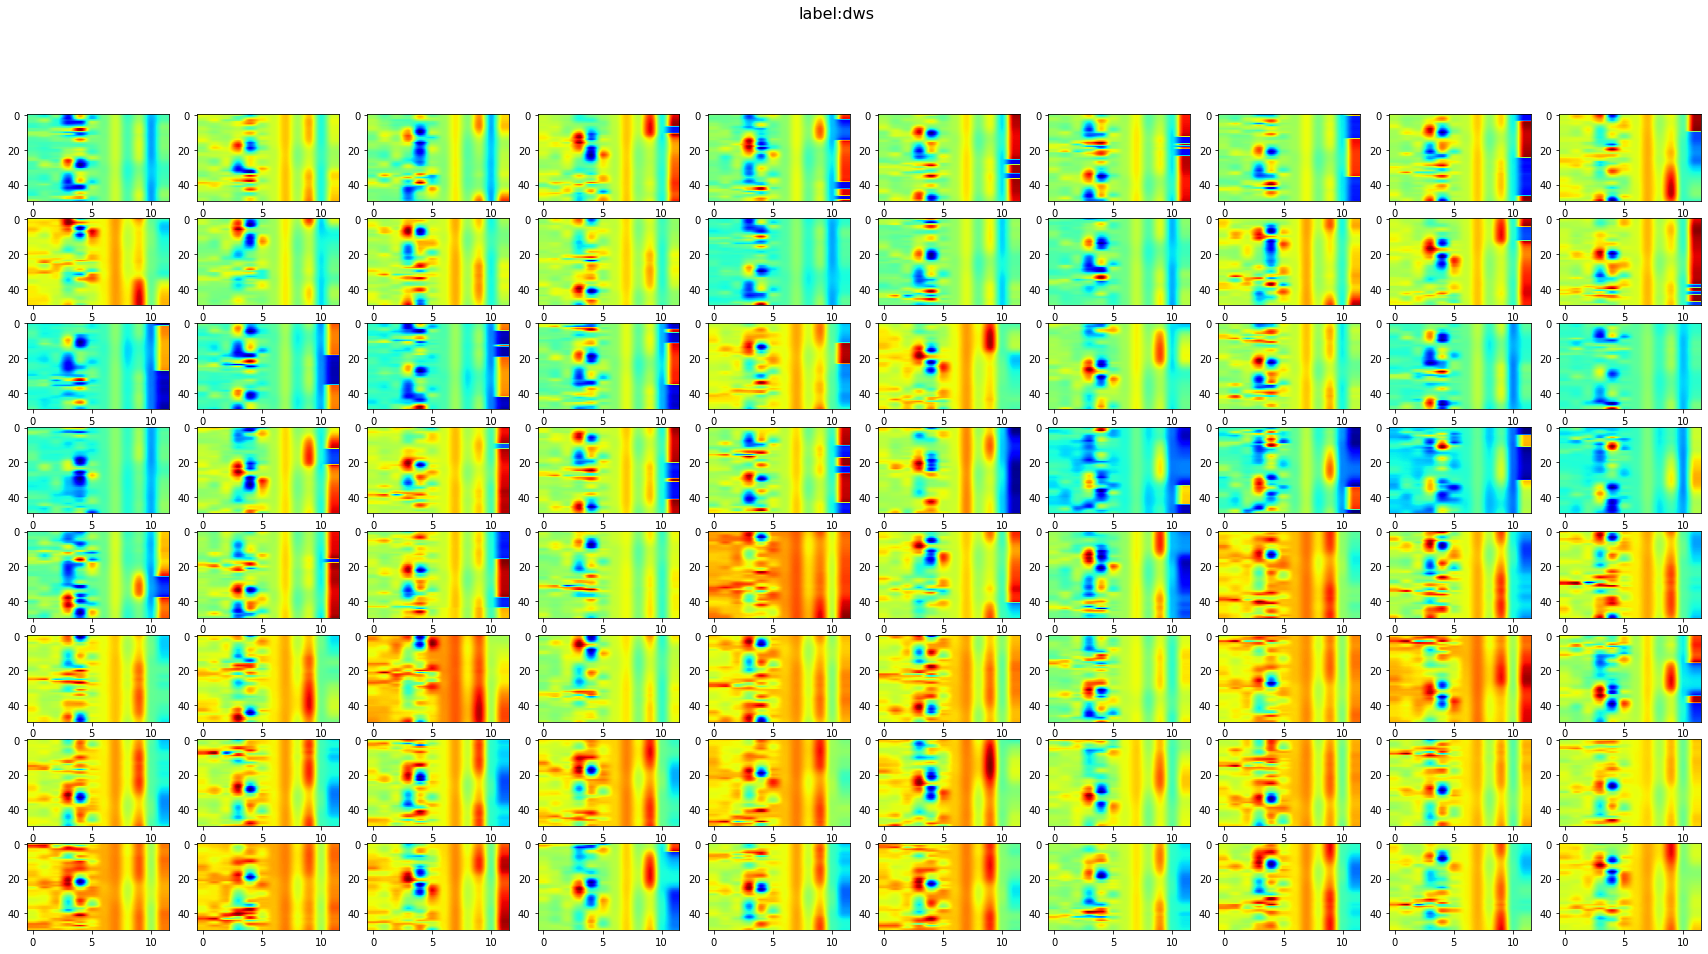

<Figure size 432x288 with 0 Axes>

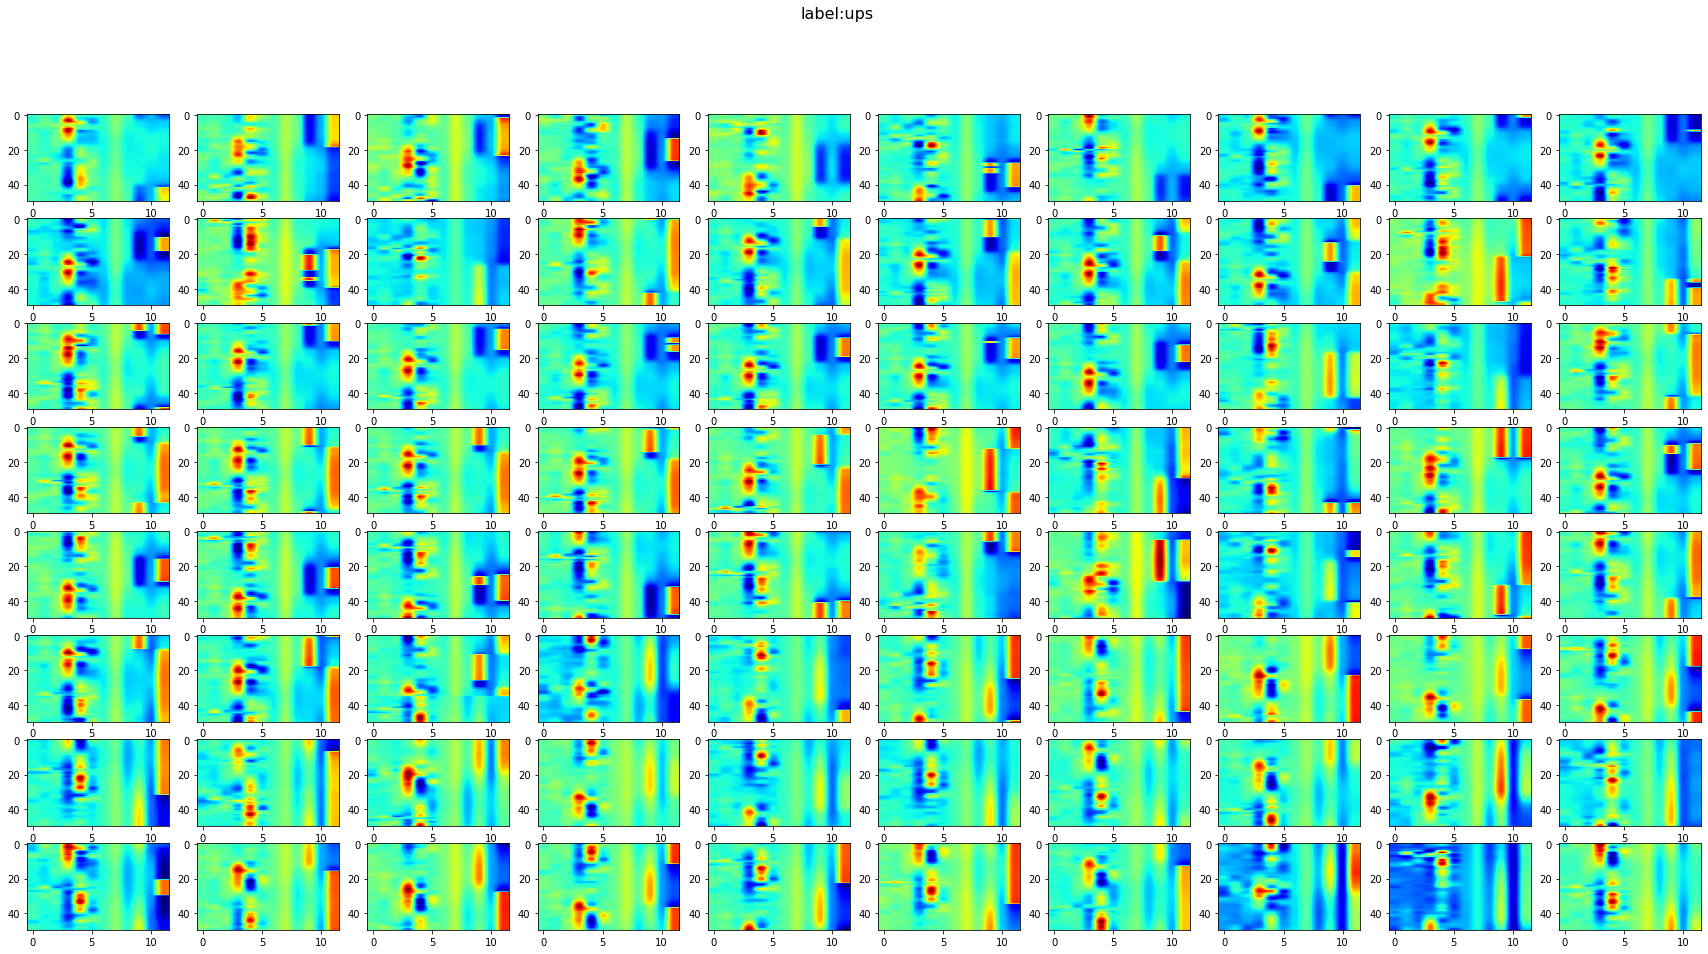

<Figure size 432x288 with 0 Axes>

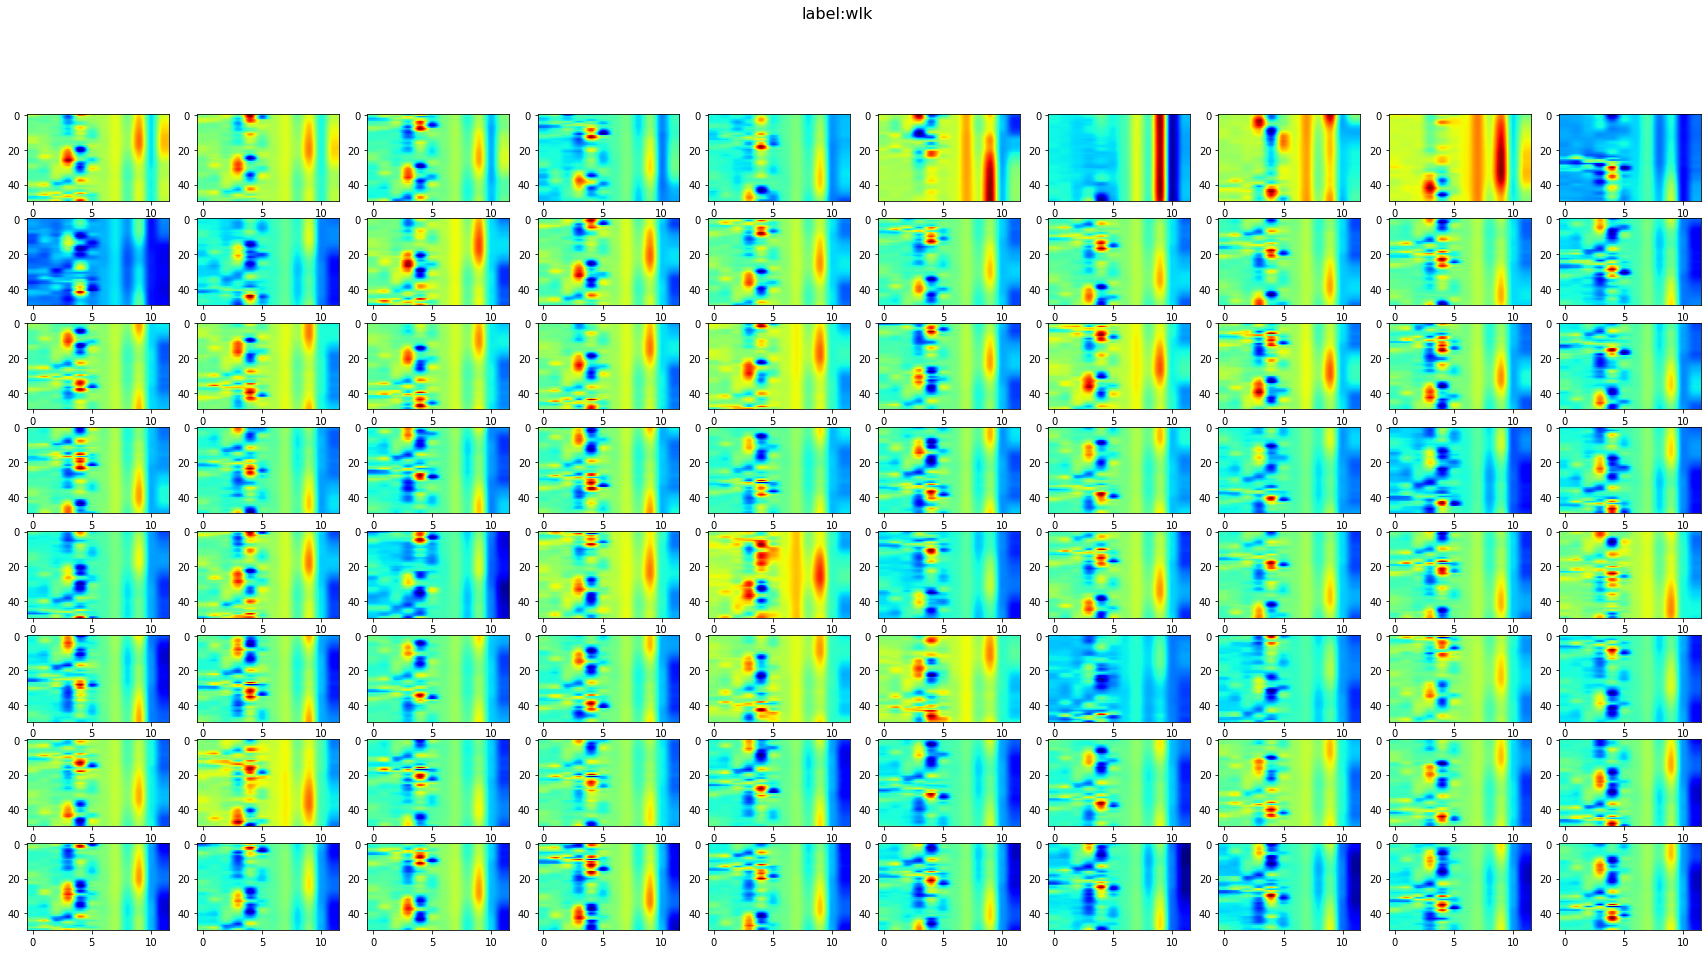

<Figure size 432x288 with 0 Axes>

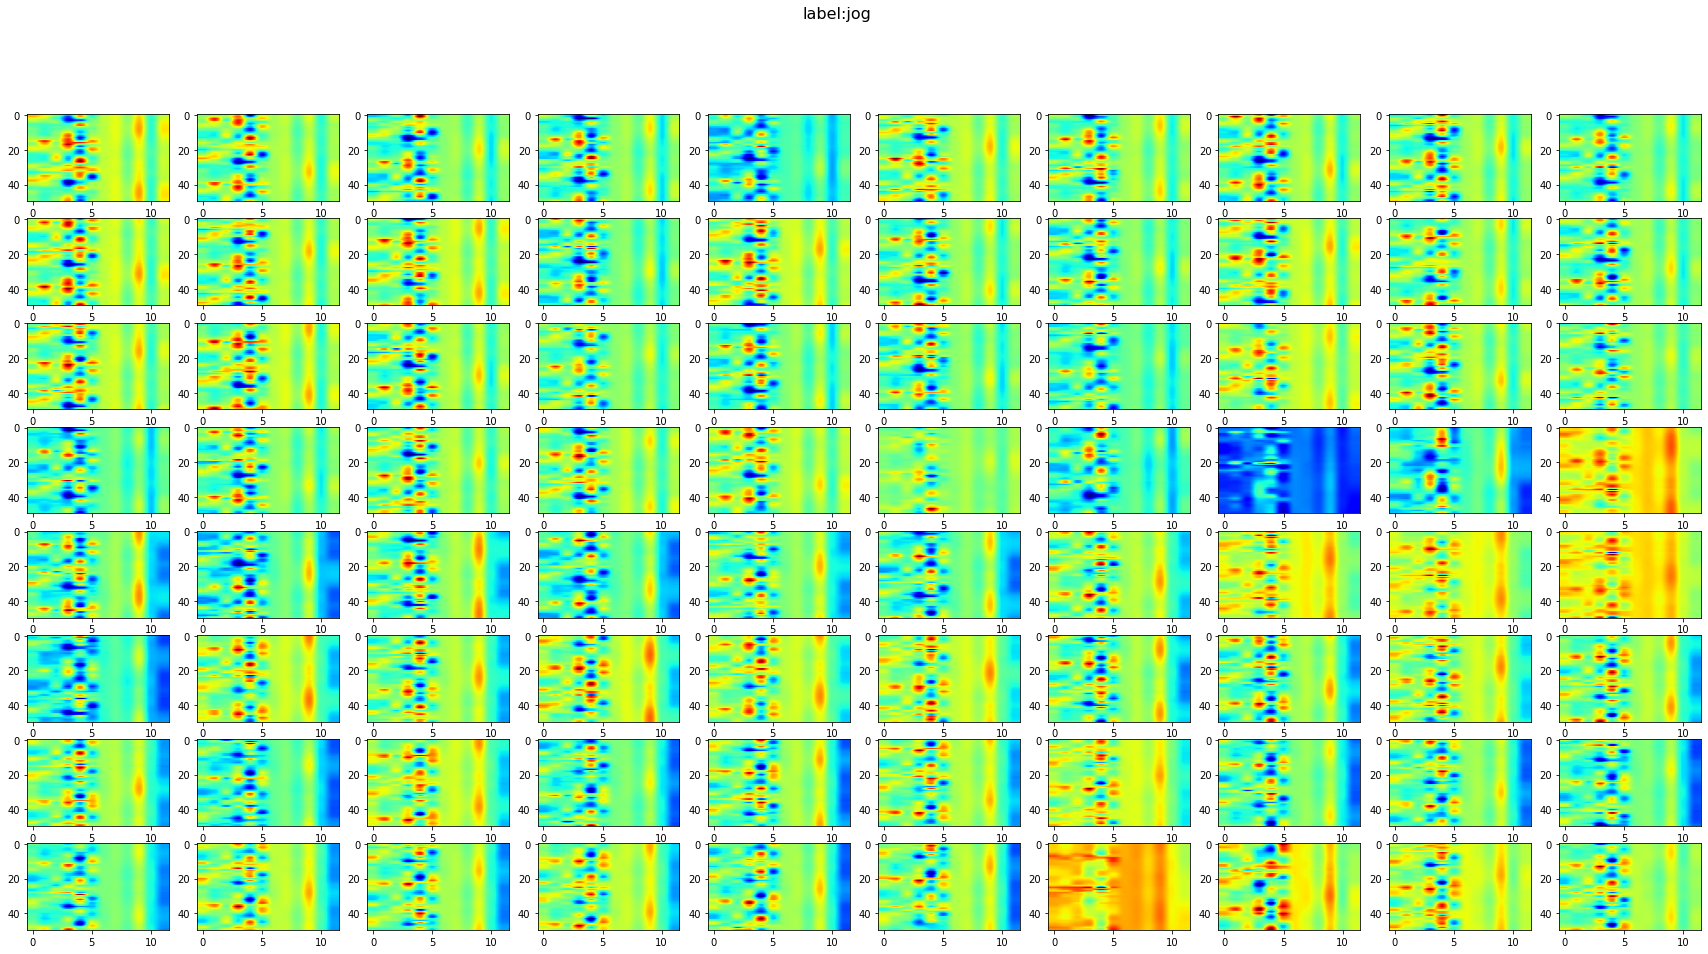

<Figure size 432x288 with 0 Axes>

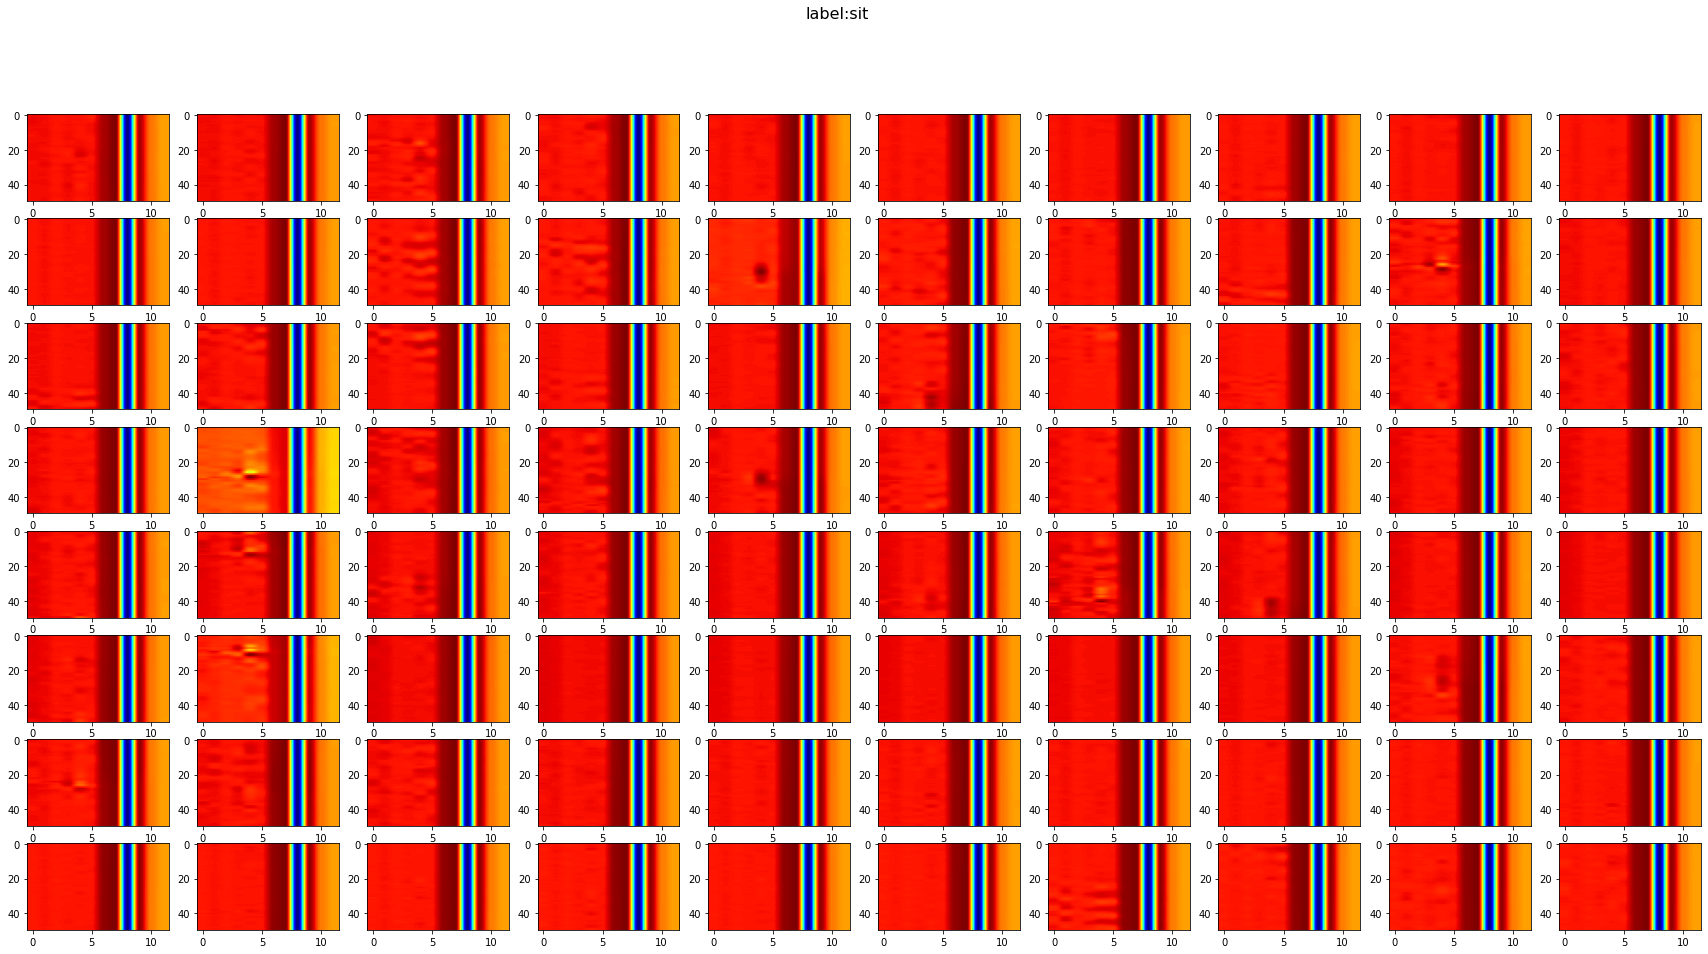

<Figure size 432x288 with 0 Axes>

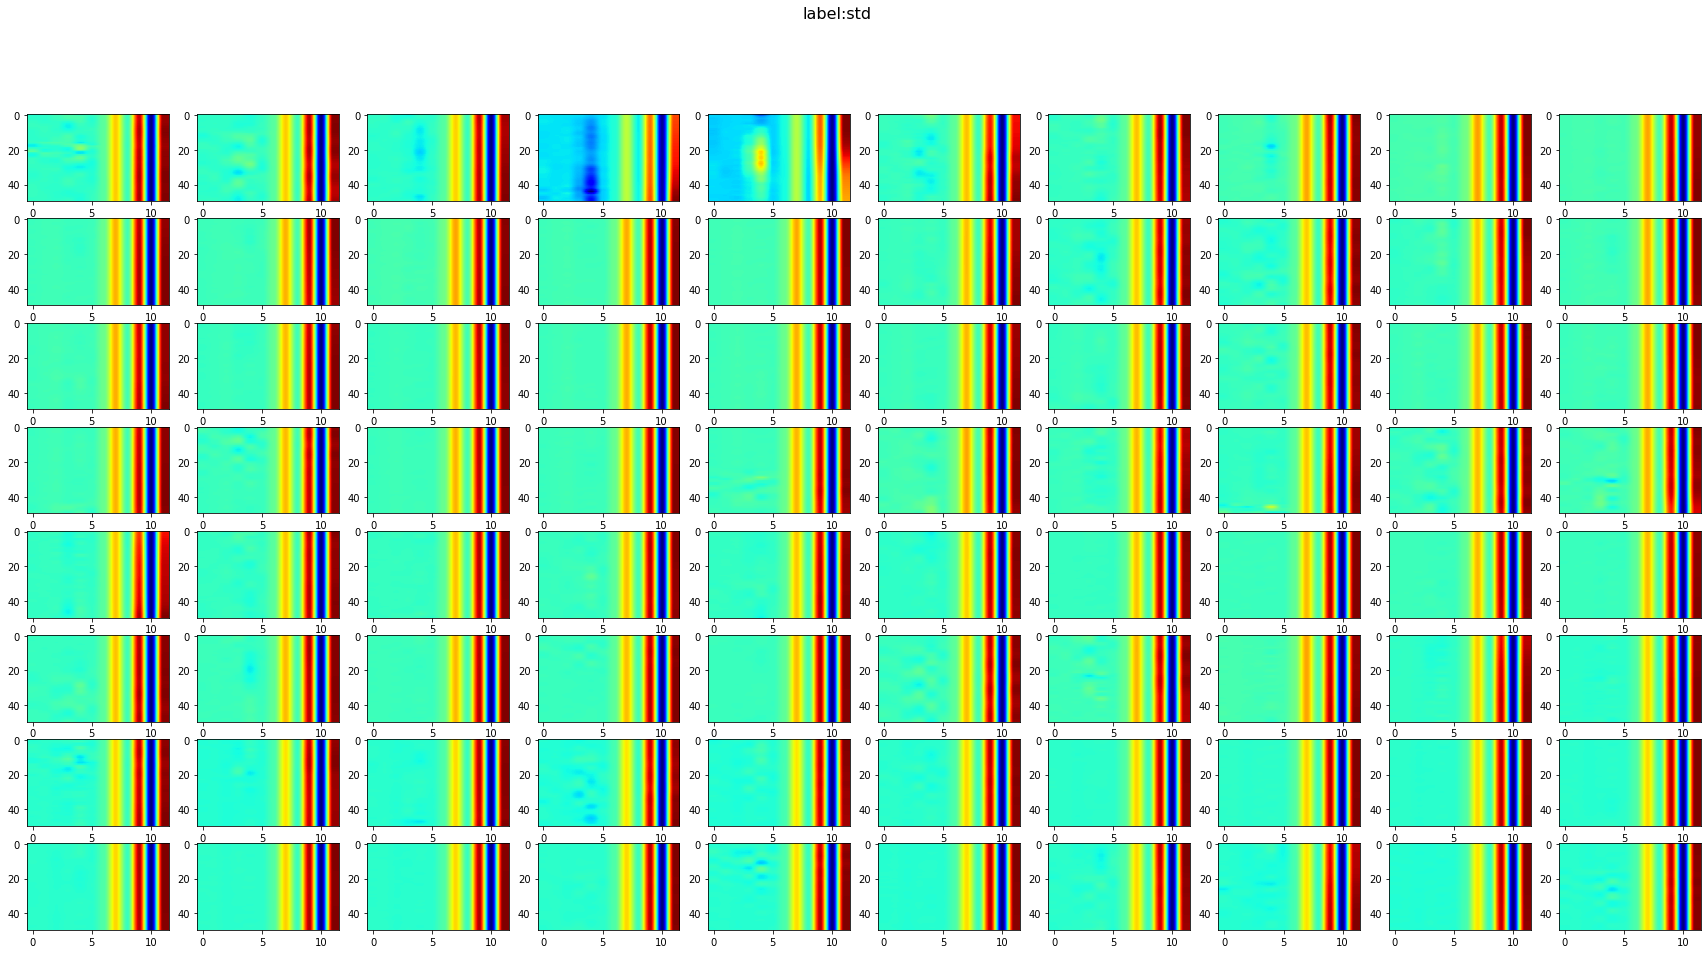

In [ ]:
user = "2" #@param [1,2,3,4,5,6,7,8,9,10]
labels_to_display =dataHar.get_activities_name()
sensors=dataHar.get_sensors_names()

folder_images= 'images_train'
def plot_images(X,label):
  plt.figure()
  print(label)
  epocas=50
  print((X.shape)[0],(X.shape)[0]/epocas)

  
  
  ax1=(X.shape)[0]/epocas
  ncols=10
  print(ax1)
  fig, axs = plt.subplots(figsize=(30, 15),nrows=int(nimages/ncols), ncols=ncols)
  fig.suptitle(label, fontsize=16)
  j=0
  epcz=0
  for i in range(nimages):
      #print(j,int(i%ncols))
      ax=axs[j,int(i%ncols)]
      image=X[epcz:epcz+epocas]
      ax.imshow(image, aspect='auto', cmap='jet')
      plt.imsave(folder_images+'/'+label+"/"+str(i)+'.png',image,cmap='jet')
      epcz=epcz+epocas
      if(i%ncols==ncols-1):
        j=j+1
    

nimages=80
df_user=dataHar.get_data_by_user(df_data_Har_train,user)


#labels_to_display=['label:PHONE_IN_POCKET',
# 'label:PHONE_IN_HAND']
labels_df = df_user.loc[:,labels_to_display]
num_labels=labels_df[labels_df == 1].count().sort_values(ascending=False)
fig = px.bar(df_user, x=labels_to_display, y=num_labels, color=num_labels, title="Long-Form Input")
fig.show()
print(min(num_labels))
create_images_folders(labels_to_display,folder_images)
for label in labels_to_display:
    X, targets=dataHar.get_sensors_values(df_user,sensors,[label])
    if(len(X)>nimages*10):
      if not os.path.exists(folder_images+'/'+label):
            os.makedirs(folder_images+'/'+label)
      plot_images(X,label)


In [ ]:
import itertools



import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

module_selection = ("mobilenet_v2_100_224", 224) #@param ["(\"mobilenet_v2_100_224\", 224)", "(\"inception_v3\", 299)"] {type:"raw", allow-input: true}
handle_base, pixels = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/imagenet/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {}".format(MODULE_HANDLE, IMAGE_SIZE))

BATCH_SIZE = 32 #@param {type:"integer"}
data_dir ="images_train"
datagen_kwargs = dict(rescale=1./255, validation_split=.20)
dataflow_kwargs = dict(target_size=IMAGE_SIZE, batch_size=BATCH_SIZE,
                   )

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    **datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
    data_dir, subset="validation", shuffle=False, **dataflow_kwargs)

do_data_augmentation = False #@param {type:"boolean"}
if do_data_augmentation:
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rotation_range=5,
      horizontal_flip=True,
      width_shift_range=0.2, height_shift_range=0.2,
      shear_range=0.2, zoom_range=0.2,
      **datagen_kwargs)
else:
  train_datagen = valid_datagen
train_generator = train_datagen.flow_from_directory(
    data_dir, subset="training", shuffle=True, **dataflow_kwargs)
do_fine_tuning = True #@param {type:"boolean"}

print("Building model with", MODULE_HANDLE)
model = tf.keras.Sequential([
    # Explicitly define the input shape so the model can be properly
    # loaded by the TFLiteConverter
    tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)),
    hub.KerasLayer(MODULE_HANDLE, trainable=do_fine_tuning),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(train_generator.num_classes,
                          kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
model.build((None,)+IMAGE_SIZE+(3,))
model.summary()

model.compile(
  optimizer=tf.keras.optimizers.SGD(lr=0.005, momentum=0.9), 
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
  metrics=['accuracy'])

steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = valid_generator.samples // valid_generator.batch_size
hist = model.fit(
    train_generator,
    epochs=40, steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=validation_steps).history



plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])

TF version: 2.7.0
Hub version: 0.12.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is NOT AVAILABLE
Using https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4 with input size (224, 224)
Found 96 images belonging to 6 classes.
Found 384 images belonging to 6 classes.
Building model with https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 6)                 7686      
                                                                 
Total params: 2,265,670
Trainable 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



Epoch 1/40
12/12 [==============================] - 93s 7s/step - loss: 1.2283 - accuracy: 0.6458 - val_loss: 1.8360 - val_accuracy: 0.4583
Epoch 2/40
12/12 [==============================] - 80s 7s/step - loss: 0.7752 - accuracy: 0.9167 - val_loss: 2.0209 - val_accuracy: 0.4375
Epoch 3/40
12/12 [==============================] - 83s 7s/step - loss: 0.6359 - accuracy: 0.9661 - val_loss: 1.7860 - val_accuracy: 0.3646
Epoch 4/40
12/12 [==============================] - 81s 7s/step - loss: 0.5771 - accuracy: 0.9922 - val_loss: 1.6472 - val_accuracy: 0.6354
Epoch 5/40
12/12 [==============================] - 80s 7s/step - loss: 0.5836 - accuracy: 0.9922 - val_loss: 1.5220 - val_accuracy: 0.7188
Epoch 6/40
12/12 [==============================] - 79s 7s/step - loss: 0.5486 - accuracy: 1.0000 - val_loss: 1.4327 - val_accuracy: 0.7292
Epoch 7/40
12/12 [==============================] - 82s 7s/step - loss: 0.5455 - accuracy: 1.0000 - val_loss: 1.1222 - val_accuracy: 0.7812
Epoch 8/40
12/12 [==

In [ ]:
model.evaluate_generator(generator=valid_generator,
steps=10)

STEP_SIZE_TEST=valid_generator.n
valid_generator.reset()
pred=model.predict_generator(valid_generator,
steps=STEP_SIZE_TEST,
verbose=1)

In [ ]:
user = "1" #@param [1,2,3,4,5,6,7,8,9,10]
labels_to_display =dataHar.get_activities_name()
sensors=dataHar.get_sensors_names()

folder_images= 'images_test'
def plot_images(X,label):
  plt.figure()
  print(label)
  epocas=50
  print((X.shape)[0],(X.shape)[0]/epocas)

  
  
  ax1=(X.shape)[0]/epocas
  ncols=5
  print(ax1)
  fig, axs = plt.subplots(figsize=(30, 15),nrows=int(nimages/ncols), ncols=ncols)
  fig.suptitle(label, fontsize=16)
  j=0
  epcz=0
  for i in range(nimages):
      #print(j,int(i%ncols))
      ax=axs[j,int(i%ncols)]
      image=X[epcz:epcz+epocas]
      ax.imshow(image, aspect='auto', cmap='jet')
      plt.imsave(folder_images+'/'+label+"/"+str(i)+'.png',image,cmap='jet')
      epcz=epcz+epocas
      if(i%ncols==ncols-1):
        j=j+1
    

nimages=10
df_user=dataHar.get_data_by_user(df_data_Har_test,user)


#labels_to_display=['label:PHONE_IN_POCKET',
# 'label:PHONE_IN_HAND']
labels_df = df_user.loc[:,labels_to_display]
num_labels=labels_df[labels_df == 1].count().sort_values(ascending=False)
fig = px.bar(df_user, x=labels_to_display, y=num_labels, color=num_labels, title="Long-Form Input")
fig.show()
print(min(num_labels))
create_images_folders(labels_to_display,folder_images)
for label in labels_to_display:
    X, targets=dataHar.get_sensors_values(df_user,sensors,[label])
    if(len(X)>nimages*10):
      if not os.path.exists(folder_images+'/'+label):
            os.makedirs(folder_images+'/'+label)
      plot_images(X,label)


In [ ]:
sunflower_url = "/content/images_test/label:dws/0.png"
sunflower_path = sunflower_url

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(224, 224)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


In [ ]:
%pip uninstall umap
%pip install umap-learn

### importando as bibliotecas

In [ ]:
from pandas import Series
import matplotlib.pylab as plt
import matplotlib.pyplot as pyplt
##________________________________
## For Example: Attiude data
## female
data = train_ts[train_ts[:,-1]==0]
## jogging
data = data[data[:,-4]==1]
## 10 seconds
data = pd.DataFrame(data[10000:10500,0:3])
data.plot()
plt.xlabel('Second', fontsize=18)
plt.ylabel('Value', fontsize=16)
lgnd=plt.legend()
lgnd.get_texts()[0].set_text('roll')
lgnd.get_texts()[1].set_text('pitch')
lgnd.get_texts()[2].set_text('yaw')
fig = pyplt.gcf()
fig.set_size_inches(18, 8)
plt.show()

In [ ]:
#@title importando bibliotecas  
import ipywidgets as widgets
from IPython.display import display
from sklearn import manifold, datasets
import os
import requests, zipfile
import pandas as pd
import glob
import numpy as np
import tensorflow as tf
import requests, zipfile, io
pd.options.mode.chained_assignment = None  # default='warn'

urlretrieve(url)
# funções globais
def downloadzip(url): 
  
  r = requests.get(url)
  z = zipfile.ZipFile(io.BytesIO(r.content))
  z.extractall()


In [ ]:
#@title Selecione o usuario e a feature para plotar  { run: "auto" }
import seaborn as sns
#@title Selecione os labels e as features para serem plotadas na figura de dispersão { run: "auto" }
user = "9" #@param [1,2,3,4,5,6,7,8,9,10]
feature = 'userAcceleration.x' #@param ["attitude.roll",	"attitude.pitch",	"attitude.yaw",	"gravity.x",	"gravity.y"	,"gravity.z",	"rotationRate.x",	"rotationRate.y",	"rotationRate.z",	"userAcceleration.x",	"userAcceleration.y",	"userAcceleration.z"]


%matplotlib inline
fig, axes = plt.subplots(1, 3, figsize=(30, 4))
df_user=dataHar.get_data_by_user(df_data_Har_train,user)


sns.stripplot(data=df_user, x=feature, ax=axes[0], alpha=0.2)
sns.boxplot(data=df_user, x=feature, ax=axes[1])
sns.violinplot(data=df_user, x=feature, ax=axes[2])
df_user1=df_user.dropna(axis=1)
#data_table.DataTable(df_user1, include_index=True, num_rows_per_page=30)

##MotionSense Dataset: Dados de atividade humana baseada em sensores e reconhecimento de atributos
Este conjunto de dados inclui dados de série temporal gerados por sensores de acelerômetro e giroscópio (atitude, gravidade, userAcceleration e rotationRate).

Ele é coletado com um iPhone 6s mantido no bolso frontal do participante usando o SensingKit, que coleta informações do framework Core Motion em dispositivos iOS. Todos os dados são coletados em taxa de amostragem de 50Hz. Um total de 24 participantes em uma faixa de gênero, idade, peso e altura realizaram 6 atividades em 15 tentativas no mesmo ambiente e condições: andar de baixo, andar de cima, caminhar, correr, sentar e ficar em pé.









In [ ]:
#@title Selecione os labels e as features para serem plotadas na figura de dispersão { run: "auto" }
user = "1" #@param [1,2,3,4,5,6,7,8,9,10]
feature1 = 'userAcceleration.x' #@param ["attitude.roll",	"attitude.pitch",	"attitude.yaw",	"gravity.x",	"gravity.y"	,"gravity.z",	"rotationRate.x",	"rotationRate.y",	"rotationRate.z",	"userAcceleration.x",	"userAcceleration.y",	"userAcceleration.z"]
feature2 = 'userAcceleration.y' #@param ["attitude.roll",	"attitude.pitch",	"attitude.yaw",	"gravity.x",	"gravity.y"	,"gravity.z",	"rotationRate.x",	"rotationRate.y",	"rotationRate.z",	"userAcceleration.x",	"userAcceleration.y",	"userAcceleration.z"]


labels_to_display =dataHar.get_activities_name()
#labels_to_display=[	"label:LYING_DOWN",	"label:SITTING", "label:OR_standing",	"label:FIX_walking"]

sensor=[feature1,feature2]
df_user=dataHar.get_data_by_user(df_data_Har_train,user)
X, targets=dataHar.get_sensors_values(df_user,sensor,labels_to_display)

D=data_table.DataTable(X, include_index=True, num_rows_per_page=10)


#feature1 = 'watch_acceleration:magnitude_spectrum:log_energy_band1';
#feature2 = 'watch_acceleration:3d:mean_z';
if(len(targets)>0):
  import plotly.express as px
  df = px.data.iris()
  fig = px.scatter(X, x=feature1, y=feature2, color=targets,symbol=targets)
  fig.show()
else:
  print("nao tem amostras para esse conjunto de labels")

### Funções auxiliares para o treinamento

In [ ]:
from functools import partial
from collections import OrderedDict
import matplotlib.pyplot as plt
from umap import UMAP
from time import time
from google.colab import files
def get_model(n_neighbors,Method,n_components):
  LLE = partial(manifold.LocallyLinearEmbedding,
                n_neighbors, n_components, eigen_solver='auto')
  methods = OrderedDict()
  if(Method=="UMAP"):
    model = UMAP(n_components=n_components,n_neighbors=n_neighbors, metric='euclidean',init='random', random_state=0)
  if(Method=="LLE"):
    model= LLE(method='standard')
  if(Method=="LTSA"):
    model = LLE(method='ltsa') 
  if(Method=="Hessian LLE"):
    model= LLE(method='hessian')
  if(Method=="Modified LLE"):
    model = LLE(method='modified')
  if(Method=="Isomap"):
    model = manifold.Isomap(n_neighbors, n_components)
  if(Method=="MDS"):
    model = manifold.MDS(n_components, max_iter=100, n_init=1)
  if(Method=="SE"):
    model= manifold.SpectralEmbedding(n_components=n_components,
                                            n_neighbors=n_neighbors)
  if(Method=="t-SNE"):
    model = manifold.TSNE(n_components=n_components, init='pca',
                                  random_state=0)
  return model


## Funções auxiliares para a plotagem de dados